# Predicting Term Deposit Subscription in a Direct Marketing Campaign

It contains data from a direct marketing campaining done for a Portugal bank

the goal is to predict if the client will subcribe to the Term deposit based on the available attributes

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [78]:
dt = pd.read_csv('bank-additional-full-1.csv',sep=';' )

In [79]:
dt

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# The dataset used in this project is stored in a CSV file named term_deposit_data.csv. It contains the following attributes:

age: Age of the client

job: Type of job

marital: Marital status

education: Level of education

default: Whether the client has credit in default

housing: Whether the client has a housing loan

loan: Whether the client has a personal loan

contact: Type of communication contact

month: Last contact month of the year

day_of_week: Last contact day of the week


duration: Duration of the last contact in seconds

campaign: Number of contacts performed during this campaign

pdays: Number of days since the client was last contacted from a previous campaign

previous: Number of contacts performed before this campaign

poutcome: Outcome of the previous marketing campaign

emp.var.rate: Employment variation rate

cons.price.idx: Consumer price index

cons.conf.idx: Consumer confidence index

euribor3m: Euribor 3 month rate

nr.employed: Number of employees

y: Whether the client subscribed to a term deposit (target variable)


In [80]:
dt.dropna(inplace=True)

In [81]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41190 entries, 0 to 41194
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41190 non-null  float64
 1   job             41190 non-null  object 
 2   marital         41190 non-null  object 
 3   education       41190 non-null  object 
 4   default         41190 non-null  object 
 5   housing         41190 non-null  object 
 6   loan            41190 non-null  object 
 7   contact         41190 non-null  object 
 8   month           41190 non-null  object 
 9   day_of_week     41190 non-null  object 
 10  duration        41190 non-null  float64
 11  campaign        41190 non-null  float64
 12  pdays           41190 non-null  float64
 13  previous        41190 non-null  float64
 14  poutcome        41190 non-null  object 
 15  emp.var.rate    41190 non-null  float64
 16  cons.price.idx  41190 non-null  float64
 17  cons.conf.idx   41190 non-null  floa

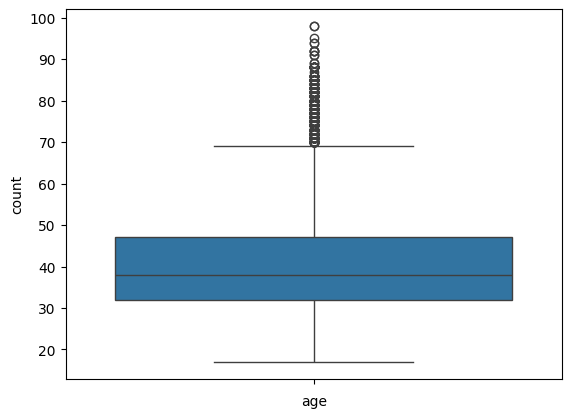

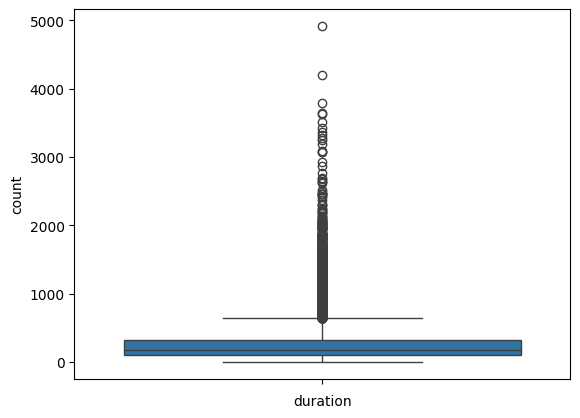

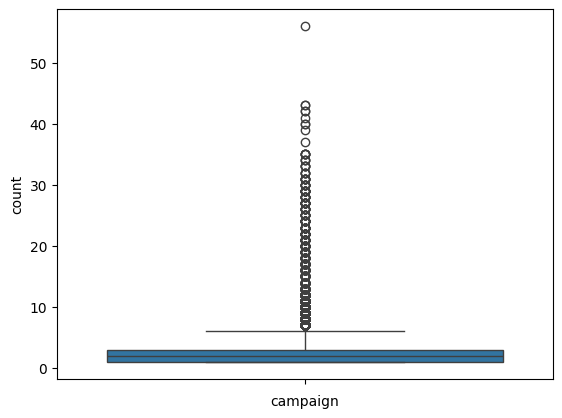

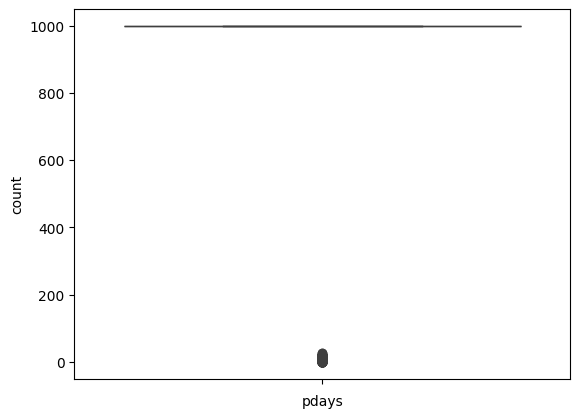

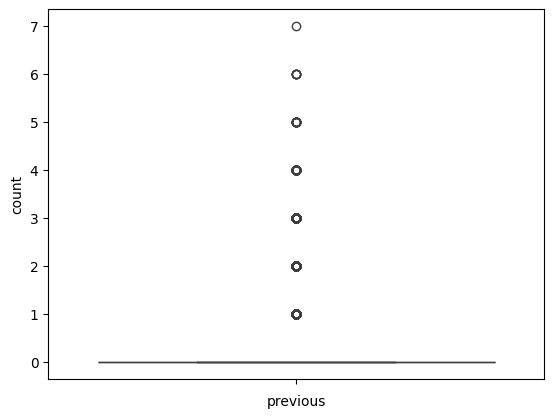

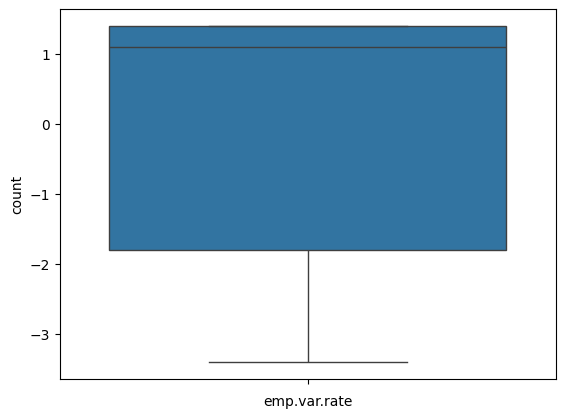

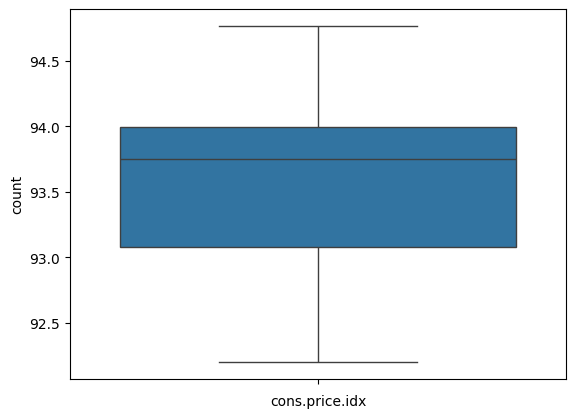

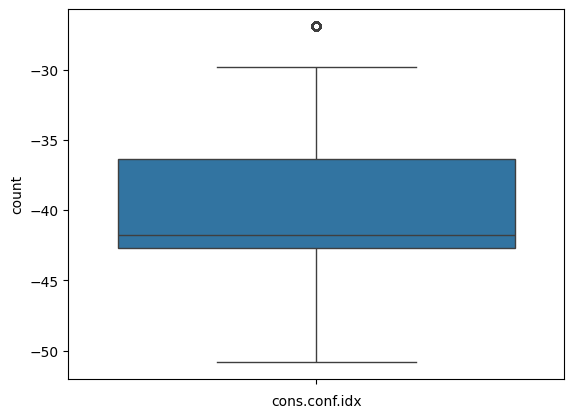

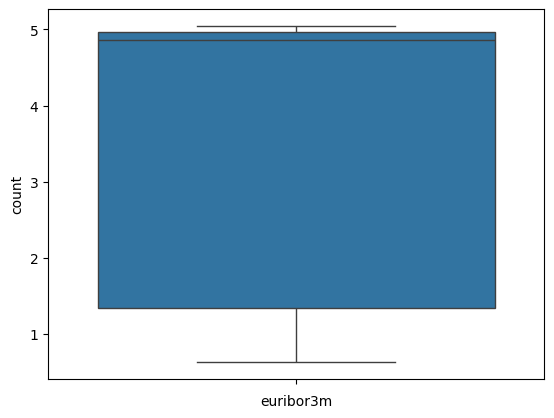

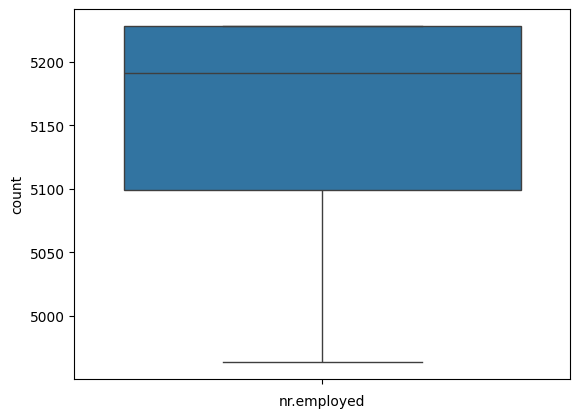

In [82]:
#outliers Detection

for i in dt.columns:
  if((dt[i].dtypes =='int64') or (dt[i].dtypes =='float')):
    sns.boxplot(dt[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()



In [83]:
out_list = ['age','duration','campaign','cons.conf.idx']

for i in out_list:
  Q1 = dt[i].quantile(0.25)
  Q3 = dt[i].quantile(0.75)

IQR = Q3-Q1

dt = dt[(dt[i]>=Q1-1.5*IQR) & (dt[i]<= Q3+1.5*IQR)]

In [84]:
dt

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [86]:
x= dt.iloc[:,:-1]
y =dt.iloc[:,-1]

In [87]:
for i in x.columns:
  if x[i].dtypes =='object':

    x[i] = le.fit_transform(x[i])


In [88]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41187,74.0,5,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767,-50.8,1.028,4963.6
41193,94.0,5,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767,-50.8,1.028,4963.6


In [89]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state =42)

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 800)
lr.fit(x_train,y_train)


LogisticRegression(max_iter=800)

In [91]:
y_pred = lr.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_pred,y_test)


0.9119379540545848

In [93]:
confusion_matrix(y_pred,y_test)

array([[8834,  688],
       [ 209,  455]])